# <center>K-Means</center>

```python
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)
```
**Параметры кластеризации:**
* `n_clusters` — количество кластеров. По умолчанию — `8`.
* `init` — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.
* `n_init` — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию `n_init=10`.
* `max_iter` — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — `300`.
* `random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.



In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# загружаем данные
df = pd.read_csv('data/pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

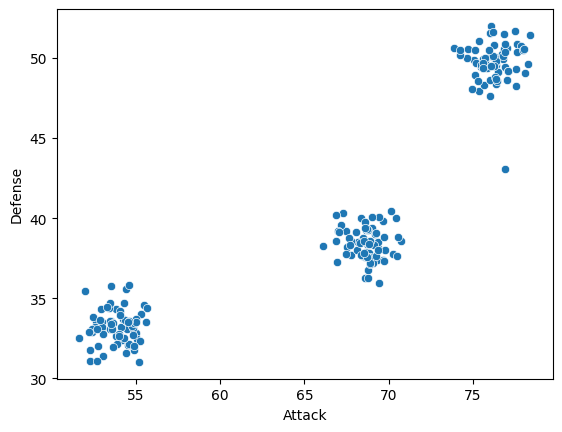

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

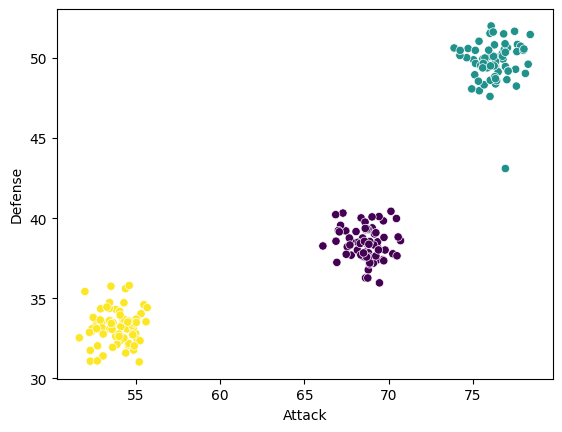

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

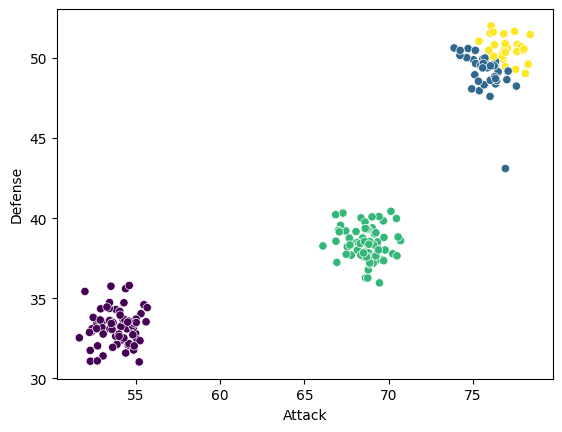

In [4]:
# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

In [5]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

## Метод локтя

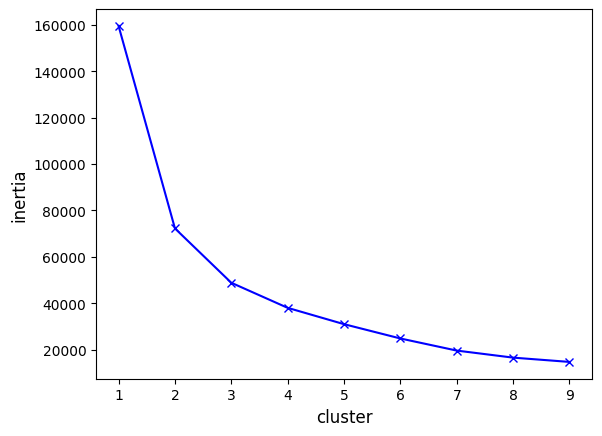

In [6]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot(range(1, 10), inertia, 'xb-')

## Коэффициент силуета

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

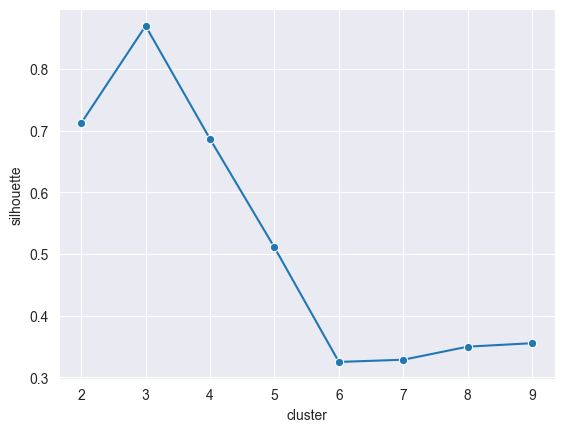

In [7]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

2.7

In [8]:
data = pd.read_csv('data/values_from_the_instrument.zip')
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<AxesSubplot: >

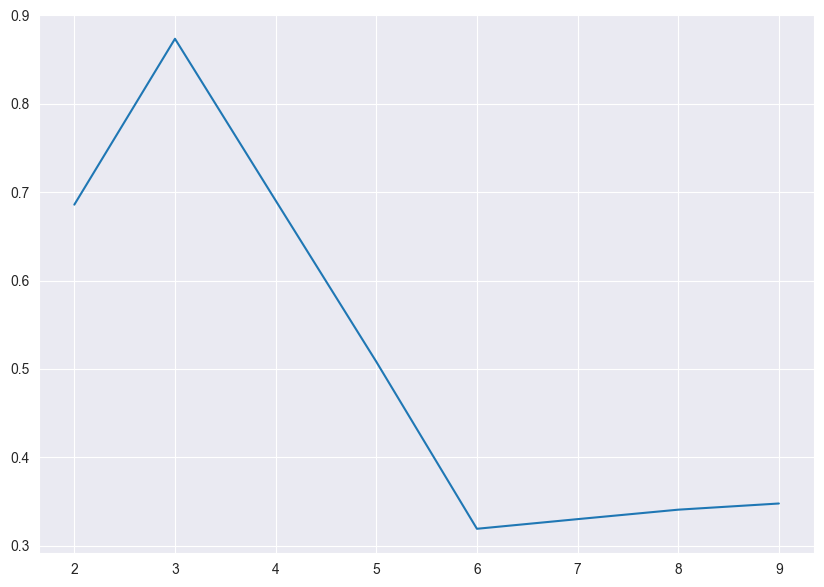

In [9]:
silhouette_res = {'score': [], 'clusters': []}
def get_silhouette(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X)
    silhouette_res['score'].append(silhouette_score(X, kmeans.labels_))
    silhouette_res['clusters'].append(n_clusters)

for n_cluster in range(2, 10):
    get_silhouette(n_cluster, data)
    
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x=silhouette_res['clusters'], y=silhouette_res['score'])

# <center>Agglomerative clustering</center>
`sklearn.cluster.AgglomerativeClustering()`
* `n_clusters` - количество кластеров; по умолчанию — `2`.
* `linkage` — метод определения расстояния между кластерами. Можно выбрать `single`, `ward`, `average`, `complete`; по умолчанию используется `ward`.

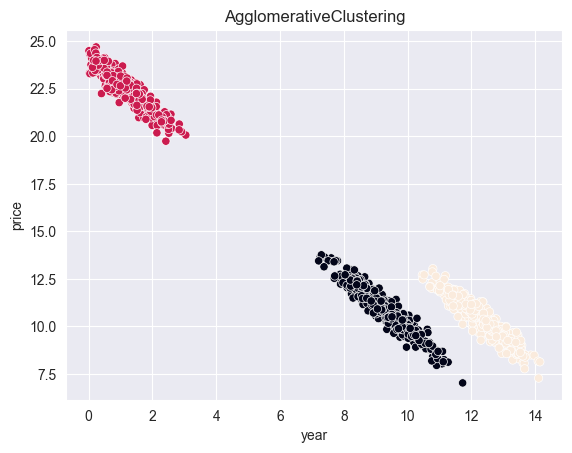

In [35]:
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('data/housing.zip')

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(data)

clusters = agglomerative.labels_

sns.scatterplot(x=data['year'], y=data['price'], c=clusters).set_title('AgglomerativeClustering');

# <center>EM-clustering</center>
`sklearn.mixture.GaussianMixture()`
* `n_components` — количество кластеров.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

In [11]:
from sklearn import mixture

data = pd.read_csv('data/housing.zip')
data.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


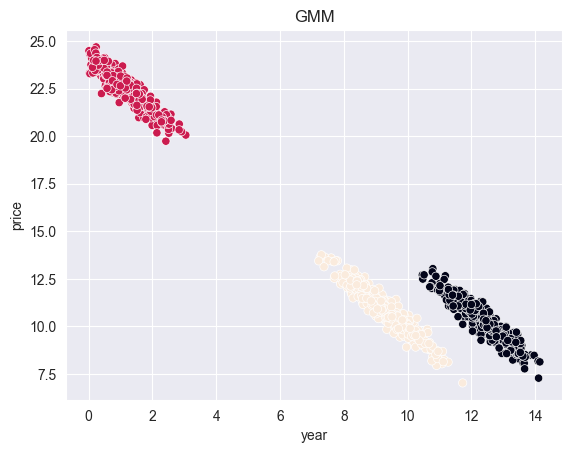

In [23]:
gmm = mixture.GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)
clusters = gmm.predict(data)

sns.scatterplot(x=data['year'], y=data['price'], c=clusters).set_title('GMM');

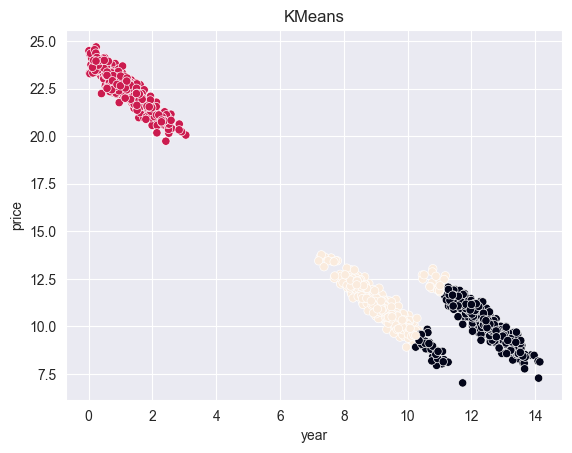

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
clusters = kmeans.labels_

sns.scatterplot(x=data['year'], y=data['price'], c=clusters).set_title('KMeans');

# <center>Spectral clustering</center>
`sklearn.cluster.SpectralClustering()`
* `n_clusters` — количество кластеров; по умолчанию — `8`.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.


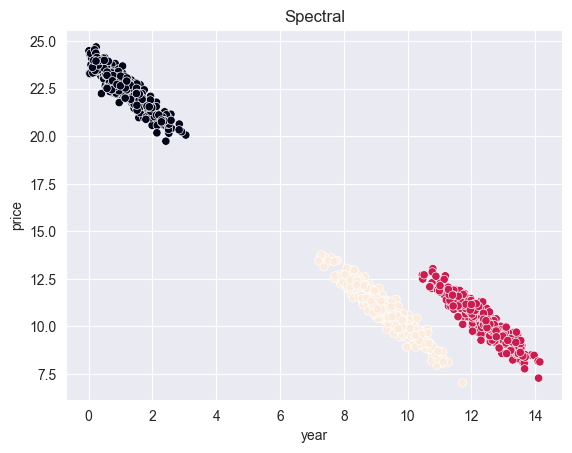

In [33]:
from sklearn.cluster import SpectralClustering

data = pd.read_csv('data/housing.zip')

spectral = SpectralClustering(n_clusters=3, random_state=42)
spectral.fit(data)

clusters = spectral.labels_

sns.scatterplot(x=data['year'], y=data['price'], c=clusters).set_title('Spectral');

# <center>DBSCAN</center>
`sklearn.cluster.DBSCAN()`
* `eps` — радиус, на основе которого выбираются центральные точки. Это один из важнейших параметров в алгоритме *DBSCAN*. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* `min_samples` — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.


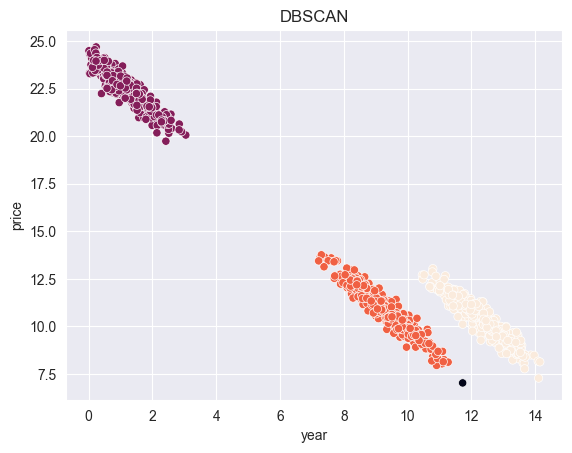

In [32]:
from sklearn.cluster import DBSCAN

data = pd.read_csv('data/housing.zip')

dbscan = DBSCAN(eps=0.7, min_samples=6)
dbscan.fit(data)

clusters = dbscan.labels_

sns.scatterplot(x=data['year'], y=data['price'], c=clusters).set_title('DBSCAN');